In [1]:
# imports 

%matplotlib inline

from IPython.display import YouTubeVideo
from IPython.display import Math

import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

import numpy as np
import numpy.random as rng

import matplotlib
import matplotlib.pyplot as plt


#Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

from sklearn.datasets import fetch_20newsgroups
import seaborn as sns; sns.set()


In [2]:
rng.seed(42)
diabetes_data = datasets.load_diabetes()
N = len(diabetes_data.target)
i = rng.randint(0,N-1,15)
X = diabetes_data.data[i,np.newaxis,2]
y = diabetes_data.target[i]

itest = np.setdiff1d( rng.randint(0,N-1,103), i)
Xtest = diabetes_data.data[itest,np.newaxis,2]
ytest = diabetes_data.target[itest]

In [3]:
data_newsgroups = fetch_20newsgroups()
data_newsgroups.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# Settings
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
matplotlib.rcParams.update({'font.size': 48})
matplotlib.rcParams.update({'lines.markersize': 14})

#### Machine learning  (Lecture 1)

### Intro, preliminaries, and simple ML approaches
 * Linear regression
 * Probability theory
 * Linear algebra

# What is machine learning?



### Computer programming
* Inputs -> Program -> Outputs

### Supervised Machine learning
* (Inputs, Outputs) -> ML -> Program
    * Inputs -> Program -> Outputs


* Classification
* Regression

### Unsupervised Machine learning
* Inputs -> UML -> Program
    * Inputs -> Program -> "pattern"/"summary"


* Clustering
* Density estimation

## Regression
* Predict continuous variable(s)


## Classification
* Predict a discrete variable(s)

# An example
* Try to predict Diabetes progression from measurements of blood pressure

### The process
1. Collect data
2. Look at it


* **"Data"**
  * The set of inputs and outputs

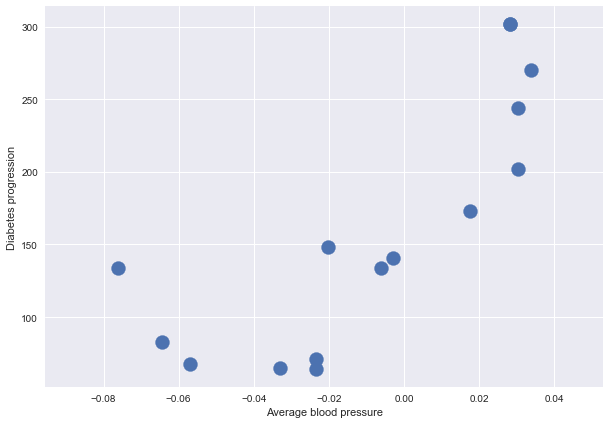

In [5]:
plt.scatter( X, y )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

### Why is blood pressure negative?

### The process
1. Collect data
2. Look at the data
3. Choose a model
4. Fit a model (Optimize parameters)


* **"Model"** 
  * the kind of program your ML system will produce
  * one way to tell the ML system properties you believe the data have


* **"Parameters"**
  * "knobs" (numbers) that determine how the model behaves
  * or things you can change about the model

### Let's fit a line
* **"Cost function"**
    * How to measure how good a model & parameters fit data

### Sum of squared differences (SSD)
* $C(m,\theta) = \sum_i ( y_i - m(x_i,\theta) )^2$


Sometimes, the true output is written as $y$ and the estimate as $\hat{y}$ *"y-hat"*
* $C = \sum_i ( y_i - \hat{y_i} )^2$

In [6]:
# A linear model
model = LinearRegression()

# Train the model using the training sets
# i.e., find parameters that make the model best fit the data
model.fit(X, y)

# Run the prediction
y_pred = model.predict(X)

print( 'Optimal parameters: ' )
print( 'slope: {:.3f}\nintercept: {:.3f}'.format(  model.coef_[0], model.intercept_ ))


Optimal parameters: 
slope: 1845.425
intercept: 177.089


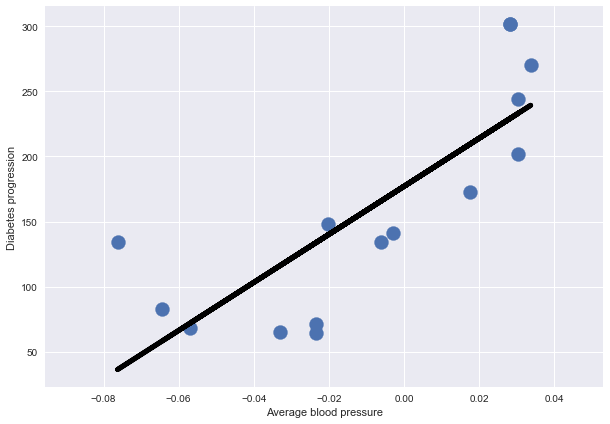

In [7]:
plt.scatter( X, y )
plt.plot( X, y_pred, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

Lets go under the hood: **How do we optimize this?**

# Linear Algebra review

## Vectors
* A list of numbers
* An arrow with its base at the origin

\begin{equation*}
\mathbf{x} = 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
\end{equation*}

* Transpose
\begin{equation*}
\mathbf{x}^T = 
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\end{equation*}


### operations
* Multiply with a scalar: $s\,\mathbf{v}$
    * result is a vector


* Add to another vector $\mathbf{z} = \mathbf{x} + \mathbf{y}$ 
    * result is a vector
    
    
* Multiply with a vector $\theta = \mathbf{x}^T \, \mathbf{y}$
    * result is a scalar
    * "Inner Product"
    * "Dot Product"
    * "Projection"

### Dot product

\begin{align}
\mathbf{x}^T \, \mathbf{y} &=  x_1 \, y_1 + x_2 \, y_2 + x_3 \, y_3 \\
\mathbf{x}^T \, \mathbf{y} &= \sum_i x_i \, y_i
\end{align}

\begin{equation*} 
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
y_1 \\ y_2 \\ y_3
\end{bmatrix}
\end{equation*}


## Matrices
* A 2d array of numbers
    * N rows
    * M columns
    * $A_{N \times M}$
* A linear transformation
* A function whose inputs are M-vectors and whose outputs are N-vectors

\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} \\
a_{2,1} & a_{2,2} & a_{2,3} \\
a_{3,1} & a_{3,2} & a_{3,3} \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
-- & \mathbf{a_1} & -- \\
-- & \mathbf{a_2}  & -- \\ 
-- & \mathbf{a_3} & -- \\
\end{bmatrix}
\end{equation*}

### operations
* Multiply with a scalar: $s\,\mathbf{M}$
    * result is a matrix


* Multiply with a vector $\mathbf{z} = \mathbf{A}\,\mathbf{v}$ 
    * result is a vector


* Multiply with a matrix $ \mathbf{C} = \mathbf{A} \, \mathbf{B}$
    * result is a matrix

### Matrix - vector multiplication
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

* Don't think of it this way (imo) :

\begin{equation*}
y_{i} = \sum_j a_{i,j} \, x_{j}
\end{equation*}



### Matrix - vector multiplication
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

* Think of it this way:

\begin{equation*}
y_{i} = \mathbf{a}_{i} \, \mathbf{x}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
-- & \mathbf{a}_{1} \, \mathbf{x} & -- \\
-- &\mathbf{a}_{2} \, \mathbf{x} & -- \\
-- &\mathbf{a}_{3} \, \mathbf{x} & -- \\
\end{bmatrix}
\end{equation*}



### Matrix - vector multiplication
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

* Or this way: As a linear combination of the columns of $\mathbf{A}$

\begin{equation*}
\begin{bmatrix}
 | & | & | \\
 \mathbf{\alpha}_1 &  \mathbf{\alpha}_2 &  \mathbf{\alpha}_3 \\
 | & | & | \\
\end{bmatrix}
\mathbf{x} =  x_1 \, \mathbf{\alpha}_1 + x_2 \, \mathbf{\alpha}_2 + x_3 \, \mathbf{\alpha}_3 = \mathbf{y}
\end{equation*}

* Which means that:

\begin{equation*}
\begin{bmatrix}
 | & | & | \\
 \mathbf{\alpha}_1 &  \mathbf{\alpha}_2 &  \mathbf{\alpha}_3 \\
 | & | & | \\
\end{bmatrix}
\mathbf{\hat{i}} =  \mathbf{\alpha}_1
\end{equation*}

where $\mathbf{\hat{i}}^T = [1 \,\, 0 \,\, 0 ]$

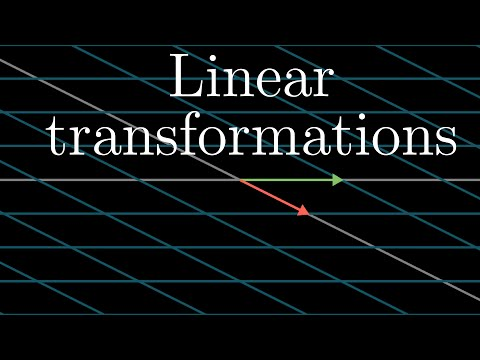

In [8]:
YouTubeVideo('kYB8IZa5AuE', start=228)

### Matrix - vector multiplication
* As a linear system of equations

\begin{equation*}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\ y_2 \\
\end{bmatrix}
\end{equation*}

\begin{align}
a_{1,1} \, x_1  + a_{1,2} \, x_2  &= y_1 \\
a_{2,1} \, x_1  + a_{2,2} \, x_2  &= y_2
\end{align}

* When is this solvable?

### Matrix inverse
\begin{equation*}
\mathbf{A} \, \mathbf{A}^{-1} = \mathbf{I}
\end{equation*}

where

\begin{equation*}
\mathbf{I} = 
\begin{bmatrix}
1 & 0 \\ 
0 & 1 \\ 
\end{bmatrix}
\end{equation*}

### Matrix inverse to solve a linear system

If 
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

then

\begin{equation*}
\mathbf{x} = \mathbf{A}^{-1} \, \mathbf{y}
\end{equation*}

#### Don't do this in your code - it's slow!

* Is this solvable?
\begin{equation*}
\begin{bmatrix}
1 & -2 \\
-3 & 6 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\
\end{bmatrix} = 
\begin{bmatrix}
1 \\ 2 \\
\end{bmatrix}
\end{equation*}

### Eigenvalues and eigenvectors
$\mathbf{z}$ is an *eigenvector* of $\mathbf{A}$ and $\lambda$ is its *associated eigenvalue* if:

\begin{equation*}
\mathbf{A}\,\mathbf{z} = \lambda \, \mathbf{z}
\end{equation*}

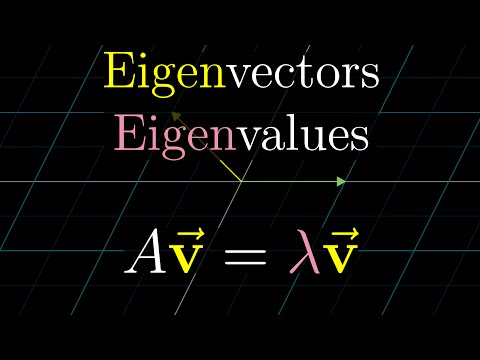

In [9]:
YouTubeVideo('PFDu9oVAE-g', start=81)

### Eigenvalues and eigenvectors
$\mathbf{z}$ is an *eigenvector* of $\mathbf{A}$ and $\lambda$ is its *associated eigenvalue* if:

\begin{equation*}
\mathbf{A}\,\mathbf{z} = \lambda \, \mathbf{z}
\end{equation*}

\begin{equation*}
(\mathbf{A} - \lambda\mathbf{I})\,\mathbf{z} = \mathbf{0}
\end{equation*}

* Does every matrix have eigenvectors?

\begin{equation*}
\begin{bmatrix}
0 & -1 \\
1 & 0 \\
\end{bmatrix}
\end{equation*}

* What are it's eigenvalues?
    * Try it, solve:
    
\begin{align}
\lambda \, x - y &= 0 \\
x + \lambda \, y &= 0
\end{align}

#### Eigenvalue / eigenvector decomposition
* Not always possible, but when $\mathbf{A}$ is *"diagonalizable"*:

\begin{equation*}
\mathbf{A} = \mathbf{Q} \, \mathbf{\Lambda} \, \mathbf{Q}^{-1}
\end{equation*}

where if $\mathbf{z}_i$ are eigenvectors, and $\lambda_i$ are eigenvalues, then:
\begin{equation*}
\mathbf{Q} = 
\begin{bmatrix}
 | & | \\
 \mathbf{z}_1 &  \mathbf{z}_2 \\
 | & | \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\mathbf{\Lambda} = 
\begin{bmatrix}
 \lambda_1 & 0 \\
 0 & \lambda_2 \\
\end{bmatrix}
\end{equation*}

### Non-square matrices
* $\mathbf{A}_{4 \times 2}$
\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
a_{1,1} & a_{1,2}  \\
a_{2,1} & a_{2,2}  \\
a_{3,1} & a_{3,2}  \\
a_{4,1} & a_{4,2}  \\
\end{bmatrix}
\end{equation*}

* What size are its "inputs"?
* What size are its "outputs"?

### "Solving" this linear system?
\begin{align}
1 \, m  &= 2 \\
1 \, m  &= 3 \\
2 \, m  &= 4 \\
2 \, m  &= 5 \\
\end{align}

## Minimize the sum of errors (back to SSD)

* $C= \sum_i ( y_i - a_i \, m )^2$

### Solvable with a special matrix
\begin{equation*}
\mathbf{A}_{4 \times 2} \, \mathbf{x}_{2 \times 1} = \mathbf{y}_{4 \times 1}
\end{equation*}

\begin{equation*}
\mathbf{x}_{2 \times 1} = \mathbf{A}^{\dagger}_{2 \times 4} \,  \mathbf{y}_{4 \times 1}
\end{equation*}


\begin{align}
a_{1,1} \, x_1  + a_{1,2} \, x_2  &= y_1 \\
a_{2,1} \, x_1  + a_{2,2} \, x_2  &= y_2 \\
a_{3,1} \, x_1  + a_{3,2} \, x_2  &= y_3 \\
a_{4,1} \, x_1  + a_{4,2} \, x_2  &= y_4 \\
\end{align}

\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
a_{1,1} & a_{1,2}  \\
a_{2,1} & a_{2,2}  \\
a_{3,1} & a_{3,2}  \\
a_{4,1} & a_{4,2}  \\
\end{bmatrix}
\end{equation*}

### Singular value decomposition

\begin{equation*}
\mathbf{A} = \mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^{T}
\end{equation*}

\begin{equation*}
\mathbf{A}^{\dagger} = \mathbf{V} \, \mathbf{\Sigma}^{\dagger} \, \mathbf{U}^{T}
\end{equation*}

\begin{equation*}
\mathbf{U} = 
\begin{bmatrix}
 | & | & | &| \\
 \mathbf{u}_1 &  \mathbf{u}_2 &  \mathbf{u}_3 &  \mathbf{u}_4 \\
 | & | & | &| \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\mathbf{\Sigma} = 
\begin{bmatrix}
\sigma_1 & 0 & 0 & 0\\
0 & \sigma_2 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\mathbf{V} = 
\begin{bmatrix}
 | & | \\
 \mathbf{v}_1 &  \mathbf{v}_2 \\
 | & | \\
\end{bmatrix}
\end{equation*}



\begin{equation*}
\mathbf{\Sigma}^{\dagger} = 
\begin{bmatrix}
\frac{1}{\sigma_1} & 0 & 0 & 0\\
0 & \frac{1}{\sigma_2} & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

![Image](512px-Singular-Value-Decomposition.svg.png)

# Back to linear regression

* Let's set up the problem
* We have:

\begin{align}
x_1 \, m  + b  &= y_1 \\
x_2 \, m  + b  &= y_2 \\
x_3 \, m  + b  &= y_3 \\
x_4 \, m  + b  &= y_4 \\
\end{align}

* and want to find the minimum-least-squares solution


\begin{equation*}
\mathbf{X} \, \mathbf{\theta} = \mathbf{y}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
x_4 & 1 \\
\end{bmatrix}
\begin{bmatrix}
m \\ b
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\ y_2 \\ y_3 \\ y_4 \\
\end{bmatrix}
\end{equation*}

In [10]:
X1 = np.concatenate( (X, np.ones( (len(X),1) )), axis=1 ) # Check that this is correct in lab
theta,resid,rank,s = np.linalg.lstsq( X1, y )

# print( 'theta :', theta )
y_linsolv_pred = np.matmul( X1, theta ); # Compare this to the previous output

print( 'Optimal parameters: ' )
print( 'slope: {:.3f}\nintercept: {:.3f}'.format(  theta[0], theta[1] ))


Optimal parameters: 
slope: 1845.425
intercept: 177.089


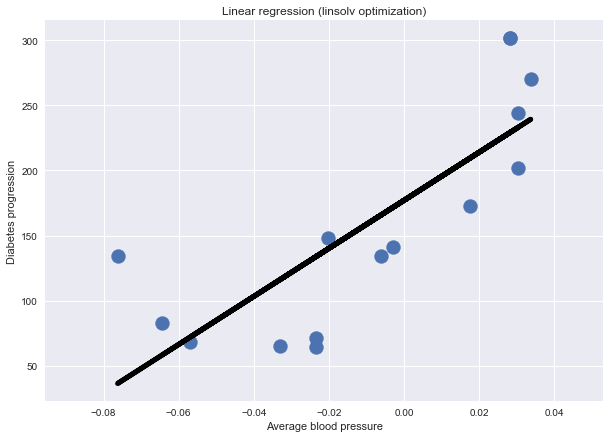

In [11]:
plt.scatter( X, y )
plt.plot( X, y_linsolv_pred, color='black', linewidth=5 )
plt.title("Linear regression (linsolv optimization)")
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

### Exercises 
1. Run this notebook
2. Read [this website about the diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
3. and [this website sklearn's Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
4. Add another feature from the dataset, and solve using sklearn's LinearRegression
5. Set up the matrix equation for linear regression with two features
6. Solve the linear system and make sure the results are the same as those you got with sklearn

# Probability review

## Axioms (rules)
* Random variable take values in a sample space $X \in \Omega$
* Probability of an event $P(X=x) \ge 0$
* $\sum_{x\in\Omega} P(x) = 1$
* if $x_1$, $x_2$ disjoint $P( x_1 \, \mathrm{or} \, x_2) = P(x_1) + P(x_2)$ 

## Probability distribution function (PDF)
* $\int_a^b p(x)$ : probability that x takes value between $a$ and $b$

In [12]:
from scipy.stats import norm

gausspdf = norm(0, 1)
x = np.linspace(-10, 10, 1000)

plt.plot(x, gausspdf.pdf(x) , c='black',
    label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma));
plt.xlabel("x");
plt.ylabel("p(x)");
plt.title('Gaussian pdf');

NameError: name 'mu' is not defined

### Gaussian ("Normal") pdf
\begin{equation*}
\mathcal{N}(x \, ; \mu, \, \sigma) = \frac{1}{ \sqrt {2\,\pi\,\sigma^2}}\exp{ - \frac{( x - \mu )^2}{2 \sigma^2}}
\end{equation*}

In [ ]:
from scipy.stats import norm

dist1 = norm(-4, 1)
dist2 = norm(2, 3)
x = np.linspace(-10, 10, 1000)

plt.plot(x, dist1.pdf(x) + dist2.pdf(x), c='black',
    label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma));
plt.xlabel("x");
plt.ylabel("p(x)");
plt.title("Mixture of two Gaussians");

## Expectation
"Mean", "Average"
* $E(X) = \sum_{\Omega} x \, p(x)$
* $E(f(X)) = \sum_{\Omega} f(x) \, p(x)$

## Joint probability distribution
* $p(X=x,Y=y) = p(x,y)$

## Marginal probability distribution
* $p(y) = \sum_x p(x,y)$

In [ ]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-3:3:0.05, -3:3:0.05]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -1.7], [[2.0, 0.3], [0.3, 0.5]])
rv2 = multivariate_normal([-0.9, 1.2], [[1.5, -1.0],[-0.6,1.4]])
jointPdf = rv.pdf(pos) + rv2.pdf(pos)

plt.contourf(x, y, jointPdf, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar();

## Conditional distribution
* $p(y \,| \, x)$ : "probability of y given x"

In [ ]:
i=100
xvalue = x[i,0]
print('xvalue {}'.format(xvalue))

plt.plot(y[i,:], jointPdf[i,:], c='black' );
plt.xlabel("y");
plt.ylabel('p(y | x = {})'.format(xvalue));

In [ ]:
i = 40
xvalue = x[i,0]
print('xvalue {}'.format(xvalue))

plt.plot(y[i,:], jointPdf[i,:], c='black' );
plt.xlabel("y");
plt.ylabel('p(y | x = {})'.format(xvalue));

# Another view of linear regression

\begin{equation*}
p( y \, ; \mu, \, \sigma ) = \mathcal{N}( \, y; \, \mu = (mx + b), \, \sigma )
\end{equation*}

## Bayes rule

\begin{equation*}
p(y\,|\,x) = \frac{p(x\,|\,y)p(y)}{p(x)}
\end{equation*}

* $p(y\,|\,x)$ : "posterior probability"
* $p(x\,|\,y)$ : "likelihood"
* $p(y)$ : "prior probability"


## Independence
* $X$,$Y$ independent $\iff p(x,y) = p(x)p(y)$

### Cost functions for classification?

* Number of errors
* (probability of error)

## Bayes optimal classifier

Back to Bayes rule

\begin{equation*}
p(y\,|\,x) = \frac{p(x\,|\,y)p(y)}{p(x)}
\end{equation*}


How to use this as a classifier?

* $y$ the class to predict
* $x$ the observations and features
* $p(y)$ prior probability of the class
* $p(x|y)$ likelihood
* $p(x)$ ...

### A more realistic case

$p(y|x_1,x_2,\ldots,x_N) = \frac{p(x_1,x_2,\ldots,x_N|y)p(y)}{p(x_1,x_2,\ldots,x_N)}$

## Naive Bayes classifier

Assume independence

$p(y|x_1,x_2,\ldots,x_N) = \frac{p(x_1|y)p(x_2|y)\ldots p(x_N|y)p(y)}{p(x_1)p(x_2)\ldots p(x_N)}$


In [ ]:
categories = [ 'rec.sport.baseball', 'rec.sport.hockey' ]
train_data_news = fetch_20newsgroups(subset='train', categories=categories)
test_data_news = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
idx = 2
print( train_data_news.data[idx])
print( 'belongs to class : {}'.format( categories[train_data_news.target[idx]] ))

In [ ]:
c = 2 # hockey
print( train_data_news.data[ np.where(train_data_news.target == c)[0][0]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Build features
# Multinomial Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit on the training data
model.fit(train_data_news.data, train_data_news.target)

# Evaluate on the test data
labels = model.predict(test_data_news.data)


confusion_mtx = confusion_matrix(test_data_news.target, labels)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train_data_news.target_names,
            yticklabels=train_data_news.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


Lets see what it looks like when the classifier makes a mistake.

In [ ]:
# about hockey
hockey = (test_data_news.target == 2) 

# but predicted to be about baseball
pred_baseball = (labels == 1)
err_i = np.where( hockey & pred_baseball )[0]

# 
print( test_data_news.data[err_i[2]] )

# Preview of next week
Using today's linear regression example

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline(
    [('poly', PolynomialFeatures(degree=3)), 
     ('linear', LinearRegression())])

# Fit the model and 
poly_model.fit( X, y )

print( 'Optimal parameters: ')
print( ' '.join('{}'.format(c) for c in poly_model.named_steps['linear'].coef_))
# print( 'R^2 Score: {0:.3f}'.format( poly_model.score(X,y)))

# Run the model for evenly spaced values of x for plotting
Xlin = np.reshape(np.linspace(-0.08,0.04),(-1,1))
y_poly_pred = poly_model.predict( Xlin )

In [ ]:
# plot
plt.scatter( X, y )
plt.plot( Xlin, y_poly_pred, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

## Test

Next, we collected more data from the same study.  Let's see how the model we trained performs on the new data.

In [ ]:
# Evaluate over equally spaced x
Xlin2 = np.reshape(np.linspace(-0.08,0.15),(-1,1))
y_poly_pred_test = poly_model.predict( Xlin2 )

print( 'R^2 Score: {0:.3f}'.format( poly_model.score(Xtest,ytest)))

plt.scatter( Xtest, ytest )
plt.plot( Xlin2, y_poly_pred_test, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

In [ ]:
print( 'R^2 Score: {0:.3f}'.format( model.score( Xtest, ytest )))

Xlin2 = np.reshape(np.linspace(-0.08,0.15),(-1,1))
y_pred_test = model.predict( Xlin2 )

plt.scatter( Xtest, ytest )
plt.plot( Xlin2, y_pred_test, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

* **Hyper parameter**
    * Something you can change about your model / optimization that isn't optimized for
    * Often this is optimized for in an "outer loop" using cross validation 


* **Cross validation**
    * The process of testing performance on data independent of those that were used for training

In [ ]:
# Set up training, validation, test splits

diabetes_data= datasets.load_diabetes()

N = len(diabetes_data.target)

# Training data (200 samples)
i_train = np.arange(0,200)
X_train = diabetes_data.data[i_train,np.newaxis,2]
y_train = diabetes_data.target[i_train]

# Validation data (100 samples)
i_validate = np.arange(201,300)
X_validate = diabetes_data.data[i_validate,np.newaxis,2]
y_validate = diabetes_data.target[i_validate]

# Test data (100 samples)
i_test = np.arange(301,400)
X_test = diabetes_data.data[i_test,np.newaxis,2]
y_test = diabetes_data.target[i_test]


In [ ]:
pmList = []
for deg in range(1,5):
    pm = Pipeline(
        [('poly', PolynomialFeatures(degree=deg)), 
        ('linear', LinearRegression())])

    # Fit the model on the training set
    pm.fit( X_train, y_train )

    # Evaluate on the validation set
    print( 'degree {0:d} : score: {1:.3f}'.format( deg, pm.score(X_validate,y_validate)))
    pmList += [pm]

In [ ]:
for pm in pmList:
    print( 'Optimal parameters ')
    print( ' '.join('{}'.format(k) for k in pm.named_steps['linear'].coef_ ))
    print( '' )
    